In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

print("Target labels:", data.target_names)  # ['malignant' 'benign']
print("Shape:", X.shape)


Target labels: ['malignant' 'benign']
Shape: (569, 30)


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))


Linear SVM Accuracy: 0.956140350877193


In [6]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))


RBF SVM Accuracy: 0.9736842105263158


In [7]:
print("Linear Kernel:")
print(confusion_matrix(y_test, y_pred_linear))

print("RBF Kernel:")
print(confusion_matrix(y_test, y_pred_rbf))


Linear Kernel:
[[41  2]
 [ 3 68]]
RBF Kernel:
[[41  2]
 [ 1 70]]


In [8]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
y_pred_grid = grid.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_grid))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Tuned Accuracy: 0.9736842105263158


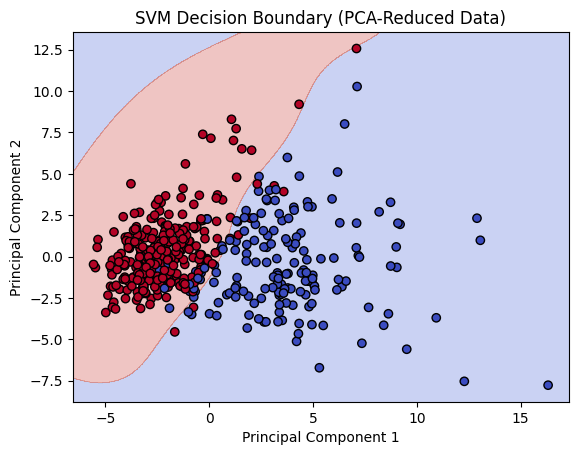

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svm_2d = SVC(kernel='rbf', C=1, gamma='scale')
svm_2d.fit(X_train_pca, y_train_pca)

# Plot
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Decision Boundary (PCA-Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
